# Assignment 2

## 2.1

Take a look at the [Linnerud dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud) in Scikit-learn. This dataset has multiple [targets](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset): 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

In your own words, describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished. Do the same for the other datapoints in this dataset.

In [302]:
import sklearn
from  sklearn import datasets, linear_model, model_selection, __version__
X, y = datasets.load_linnerud(return_X_y=True)

The two targets needed would be the size of waistline as X and situps accomplised as y. The Linnerud documentation reveals that these data are placed in the 2nd column. 

The data from the 2nd column from both X and y need to isolated into a new array with the numpy package

In [303]:
import numpy as np
X_1 = X[:, np.newaxis, 1]
y_1 = y[:, np.newaxis, 1]

Now the data need to be split into to piles of data. A good rule of thump is to use 70% of the data for training, whilst leaving 30% to the test the trained model. 

In [304]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_1, y_1, test_size=0.3)

print(X_train.shape)

(14, 1)


From here, the data can be passed to various regression models. 
The regression models are based on the cost function and uses gradient decent to find the lowest cost. With Python, the model.fit() function is commonly used. The function takes the date saved a training data as input. 
The model.predict() function creates a linear regression line based on the data left for testing: X_test. 

In [305]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

From here, the predicted regression, y_pred, can be plotted.

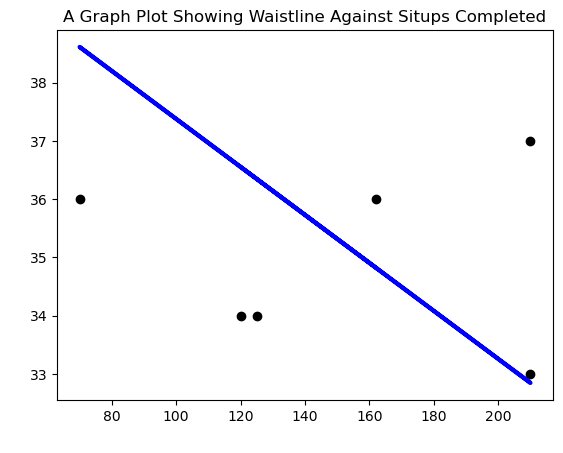

In [306]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('A Graph Plot Showing Waistline Against Situps Completed')
plt.show()

Its possible to determine how well the model predicted the values, with the model.predict() function and using sklearn metrics. 

In [307]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 6.2592414110586505
RMSE: 2.501847599486957
R2: -2.1296207055293253


Mean Square Error (MSE): The smaller the better

Root Mean Square Error (RMSE): The smaller the better

Coefficient of Determination (usually known as R-squared or R2): The bigger the better

Trying to reach better values with a polynomial regression

In [308]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [309]:
# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("MSE:", mse)


MSE: 8.032594690850237


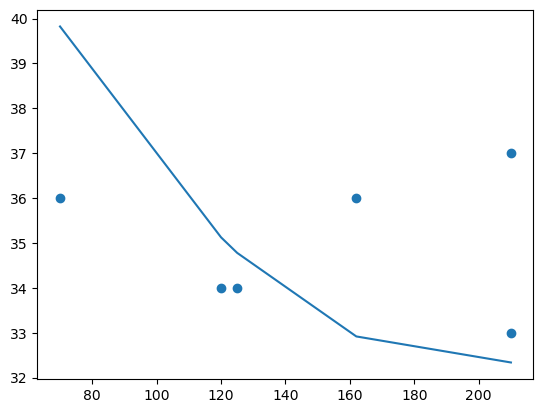

In [310]:
#plotting polynominal regression

plt.scatter(X_test, y_test)
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))

## 2.2


In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model in a Jupyter notebook. Evaluate your model by a confusion matrix: remember to calculate and visualize the ROC curve. Aim for a well-explained and well-performing model in your notebook.

In [311]:
# read pumpkin csv file

import pandas as pd
pumpkins = pd.read_csv('data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

#recalculating accordingly to package size

pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'High Price'] = pumpkins['High Price']/(1 + 1/9)

pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'High Price'] = pumpkins['High Price']/(1/2)

pumpkins.info

<bound method DataFrame.info of       City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1739  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1740  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1741  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1742  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   

         Date  Low Price  High Price  Mostly Low  ...  

In [326]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','High Price']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


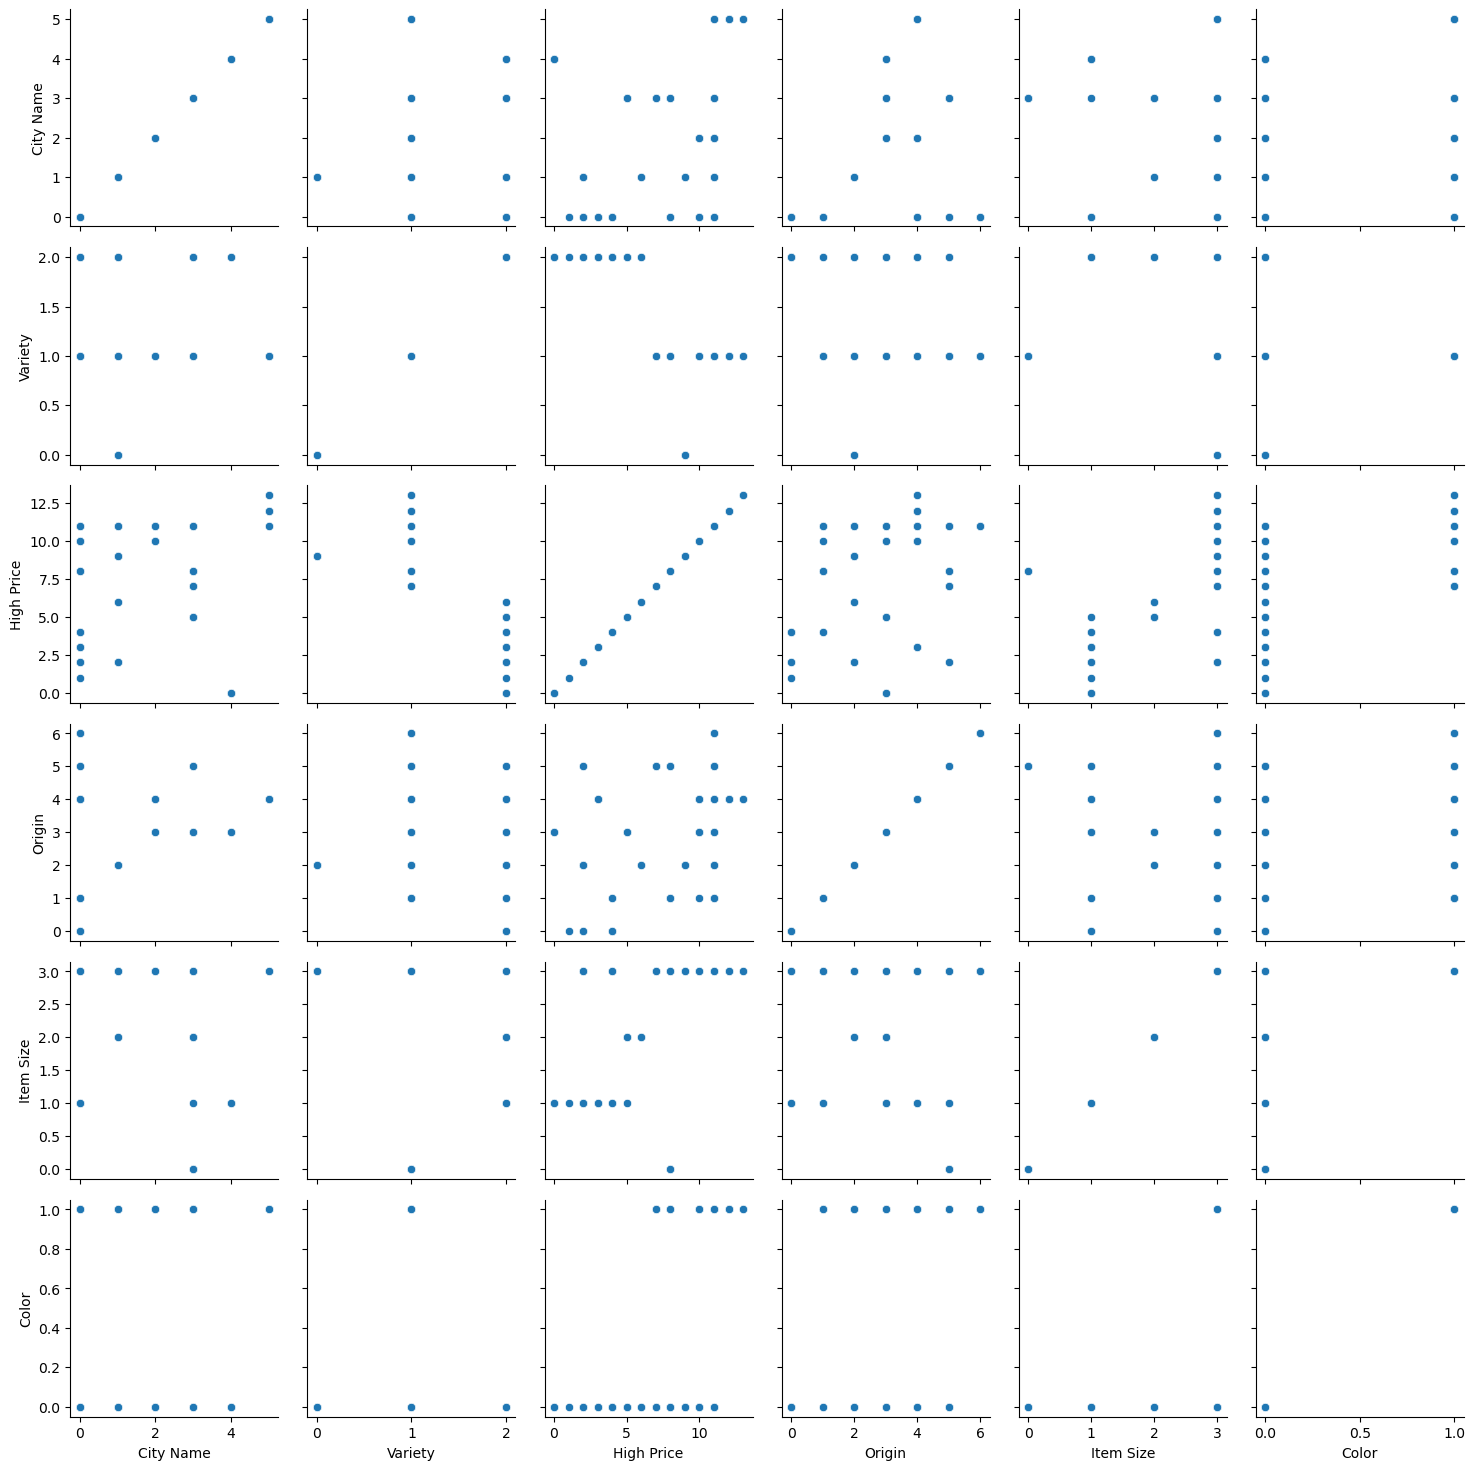

In [316]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)



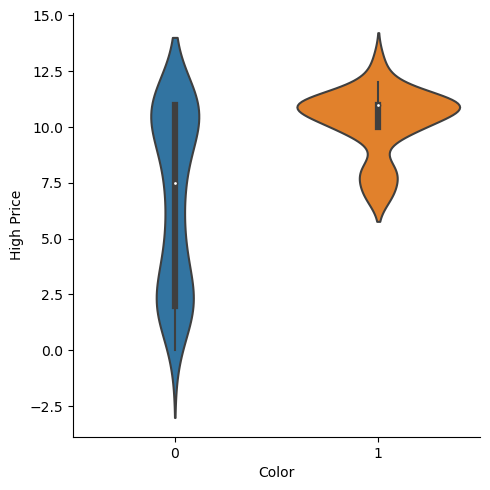

In [324]:
sns.catplot(x="Color", y="High Price",
            kind="violin", data=new_pumpkins)

In [327]:
from sklearn.model_selection import train_test_split

Selected_features = ['Color','Origin','Item Size','Variety','City Name','Package','High Price']


X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Predicted labels:  [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0]
Accuracy:  1.0


In [329]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[27,  0],
       [ 0, 11]])

In [331]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot(fpr, tpr)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

For some reason I can't plot the ROC curve. I've tried various solution but it dosen't seem to work. 

# 2.3 

## Digit Classification with Artificial Neural Networks

Part A shows you how to perform a binary classification with Perceptrons using your own framework. Using Scikit-learn on a jupyter notebook, can you train a Multilayer Perceptron on MNIST dataset for 10-digit classification? What are the performance metrics of your model? How could you improve the model performance?

Loading the MNIST dataset. The RGB data, reaching between 0-225, is normalized to 0-1. The data is then split into a training set consisting of 70% of the data. 

In [ ]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The amount of hidden layers is set to 50, the parameters (weighting factors) are updated 15 times with the iterations. The 

In [ ]:
# set up MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=15,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1
)

In [ ]:
# We probably won't converge so we'll catch the warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

    # print out the model scores
print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Iteration 1, loss = 0.34662385
Iteration 2, loss = 0.16520897
Iteration 3, loss = 0.12492789
Iteration 4, loss = 0.09951361
Iteration 5, loss = 0.08380122
Iteration 6, loss = 0.07260490
Iteration 7, loss = 0.06340561
Iteration 8, loss = 0.05702569
Iteration 9, loss = 0.04995754
Iteration 10, loss = 0.04527393
Iteration 11, loss = 0.04061896
Iteration 12, loss = 0.03597847
Iteration 13, loss = 0.03328503
Iteration 14, loss = 0.02985077
Iteration 15, loss = 0.02634450
Training set score: 0.9953265306122449
Test set score: 0.9718095238095238


The dataset could be trained with more interations, with the possibility of overfitting. 

In [ ]:
# set up MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=30,
    alpha=4e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1
)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)
    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    # print out the model scores
print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Iteration 1, loss = 0.32281732
Iteration 2, loss = 0.13564853
Iteration 3, loss = 0.09631787
Iteration 4, loss = 0.07449132
Iteration 5, loss = 0.06055658
Iteration 6, loss = 0.04974129
Iteration 7, loss = 0.04233321
Iteration 8, loss = 0.03633264
Iteration 9, loss = 0.02922161
Iteration 10, loss = 0.02433054
Iteration 11, loss = 0.02096424
Iteration 12, loss = 0.01679318
Iteration 13, loss = 0.01386115
Iteration 14, loss = 0.01186467
Iteration 15, loss = 0.01029153
Iteration 16, loss = 0.00845279
Iteration 17, loss = 0.00738095
Iteration 18, loss = 0.00644465
Iteration 19, loss = 0.00554597
Iteration 20, loss = 0.00484722
Iteration 21, loss = 0.00452957
Iteration 22, loss = 0.00413458
Iteration 23, loss = 0.00380314
Iteration 24, loss = 0.00355441
Iteration 25, loss = 0.00333586
Iteration 26, loss = 0.00315541
Iteration 27, loss = 0.00299470
Iteration 28, loss = 0.00287188
Iteration 29, loss = 0.00277917
Iteration 30, loss = 0.00269709
Training set score: 1.0
Test set score: 0.9772380

Here the test score was increased with a 6 promille increase, from increasing amount of hidden layers and interations, and L2 penalty. 

The list of performance metrics for multilayer classification includes accuracy, f1 score and ROC.
The classification report calculated the main performance metrics. 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[4826    0    0    0    0    0    0    0    0    0]
 [   0 5492    0    0    0    0    0    0    0    0]
 [   0    0 4875    0    0    0    0    0    0    0]
 [   0    0    0 5024    0    0    0    0    0    0]
 [   0    0    0    0 4820    0    0    0    0    0]
 [   0    0    0    0    0 4413    0    0    0    0]
 [   0    0    0    0    0    0 4831    0    0    0]
 [   0    0    0    0    0    0    0 5104    0    0]
 [   0    0    0    0    0    0    0    0 4783    0]
 [   0    0    0    0    0    0    0    0    0 4832]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4826
           1       1.00      1.00      1.00      5492
           2       1.00      1.00      1.00      4875
           3       1.00      1.00      1.00      5024
           4       1.00      1.00      1.00      4820
           5       1.00      1.00      1.00      4413
           6       1.00      1.00      1.00      4831
           7       1.00      1.00   

As the training score of "Training set score: 1.0" suggests, the model is fit all the the input correctly. 


In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[2053    0    4    2    1    3    7    2    4    1]
 [   0 2359    9    6    1    0    2    2    4    2]
 [   3    3 2078    4    3    2    5    6   10    1]
 [   1    2   22 2042    0   22    2    8   13    5]
 [   1    2    4    0 1962    2    6    5    2   20]
 [   2    1    4    9    2 1852    8    4   12    6]
 [   7    5    5    0   11    8 2000    3    6    0]
 [   1    6   12    2    5    3    1 2145    3   11]
 [   2   17    9   10    2   11    4    2 1971   14]
 [   3    0    2   14   21    6    1   11    8 2060]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.98      0.99      0.99      2385
           2       0.97      0.98      0.97      2115
           3       0.98      0.96      0.97      2117
           4       0.98      0.98      0.98      2004
           5       0.97      0.97      0.97      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.98   

The accurency for the Test set score of 0.9772380952380952 matches the accurancy of .98. 

Confusion matrix:
[[2053    0    4    2    1    3    7    2    4    1]
 [   0 2359    9    6    1    0    2    2    4    2]
 [   3    3 2078    4    3    2    5    6   10    1]
 [   1    2   22 2042    0   22    2    8   13    5]
 [   1    2    4    0 1962    2    6    5    2   20]
 [   2    1    4    9    2 1852    8    4   12    6]
 [   7    5    5    0   11    8 2000    3    6    0]
 [   1    6   12    2    5    3    1 2145    3   11]
 [   2   17    9   10    2   11    4    2 1971   14]
 [   3    0    2   14   21    6    1   11    8 2060]]


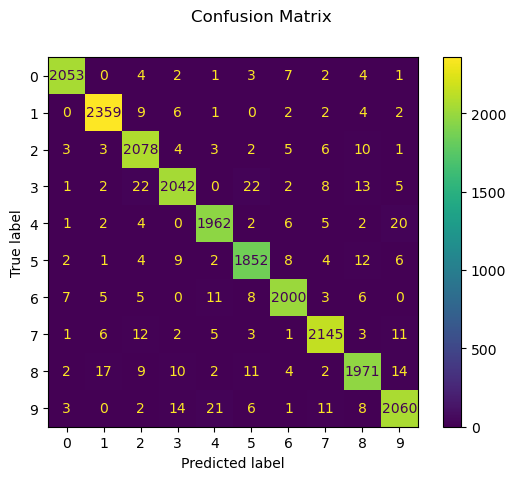

In [ ]:
#Frrom scikit-learn.org:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, predict_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()